# Calcular a expectativa de vida de um país


In [25]:
import pandas as pd
import streamlit as st
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


In [111]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [112]:
df.Year.unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000])

In [113]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [114]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [115]:
df.shape

(2938, 22)

In [116]:
print('Total de países: {}'.format(len(df.Country.unique())))

Total de países: 193


In [117]:
df.Country.value_counts()

United Republic of Tanzania    16
Morocco                        16
Chile                          16
Russian Federation             16
Hungary                        16
                               ..
Marshall Islands                1
Monaco                          1
Tuvalu                          1
Palau                           1
Nauru                           1
Name: Country, Length: 193, dtype: int64

In [118]:
exploracao = pd.DataFrame({'nomes': df.columns,'tipos':df.dtypes,'NA #': df.isna().sum(), 
                           'NA %': df.isna().sum()/df.shape[0]*100})

exploracao


,nomes,tipos,NA #,NA %
Country,Country,object,0,0.000000
Year,Year,int64,0,0.000000
Status,Status,object,0,0.000000
Life expectancy,Life expectancy,float64,10,0.340368
Adult Mortality,Adult Mortality,float64,10,0.340368
infant deaths,infant deaths,int64,0,0.000000
Alcohol,Alcohol,float64,194,6.603131
percentage expenditure,percentage expenditure,float64,0,0.000000
Hepatitis B,Hepatitis B,float64,553,18.822328
Measles,Measles,int64,0,0.000000


In [119]:
df.dropna(subset=['Life expectancy ',' thinness  1-19 years','Schooling','Hepatitis B','Alcohol','Total expenditure',' BMI ',' thinness 5-9 years','Population'], inplace=True)


In [120]:
df.shape

(1657, 22)

In [121]:
exploracao.tipos.value_counts()


float64    16
int64       4
object      2
Name: tipos, dtype: int64

In [145]:
fig = px.box(df,y="Life expectancy ", points="all",hover_data=["Country"])
fig.update_layout(
    title="Boxplot da expectativa de vida dos países")
fig.show()

In [146]:
fig = px.box(df, x='Country',y="Life expectancy ")
fig.update_layout(
    title="Boxplot da expectativa de vida por país")
fig.show()

In [147]:
fig = px.box(df, x='Country',y="infant deaths")
fig.update_layout(
    title="Boxplot da quantidade de morte infantis por país")
fig.show()

A India é o país que mais apresenta morte infantil

In [87]:
fig = px.scatter(df, x=" thinness 5-9 years", y="infant deaths", color="Country",
                 size='infant deaths', hover_data=['Country','infant deaths'])
fig.show()

2020-04-26 14:04:20,072 [1818] WARNING  py.warnings:110: [JupyterRequire] /Users/lauradamacenodealmeida/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/lauradamacenodealmeida/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2020-04-26 14:04:20,722 [1818] WARNING  py.warnings:110: [JupyterRequire] /Users/lauradamacenodealmeida/opt/anaconda3/lib/python3.7/site-packages/pandas/plo

Country
Afghanistan    AxesSubplot(0.125,0.125;0.775x0.755)
Albania        AxesSubplot(0.125,0.125;0.775x0.755)
Algeria        AxesSubplot(0.125,0.125;0.775x0.755)
Angola         AxesSubplot(0.125,0.125;0.775x0.755)
Argentina      AxesSubplot(0.125,0.125;0.775x0.755)
                               ...                 
Uruguay        AxesSubplot(0.125,0.125;0.775x0.755)
Uzbekistan     AxesSubplot(0.125,0.125;0.775x0.755)
Vanuatu        AxesSubplot(0.125,0.125;0.775x0.755)
Zambia         AxesSubplot(0.125,0.125;0.775x0.755)
Zimbabwe       AxesSubplot(0.125,0.125;0.775x0.755)
Length: 133, dtype: object

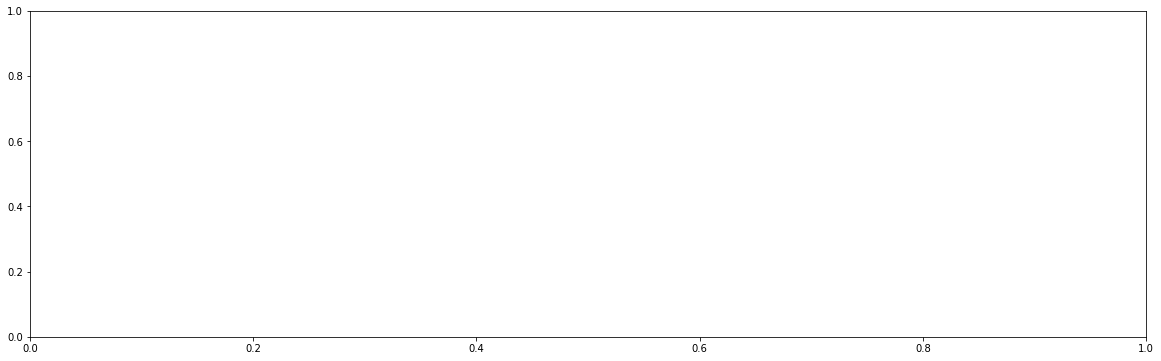

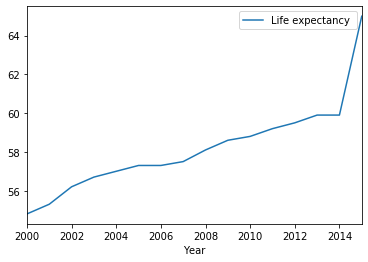

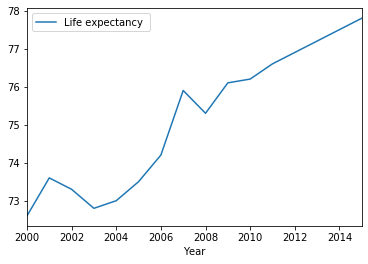

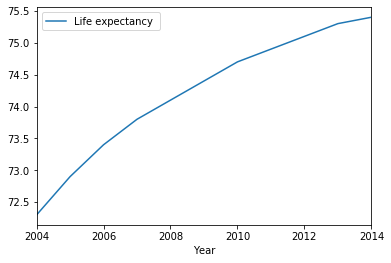

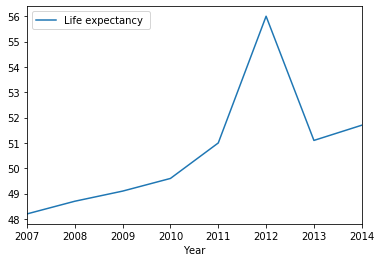

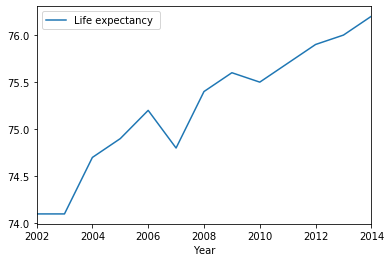

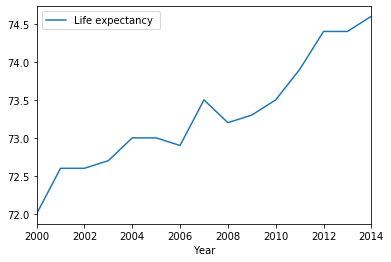

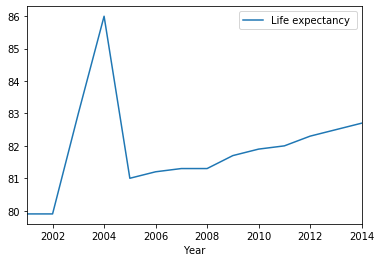

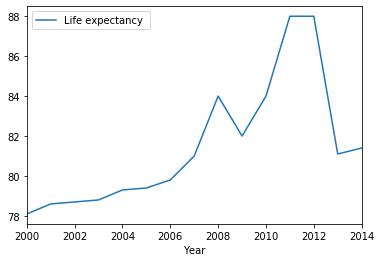

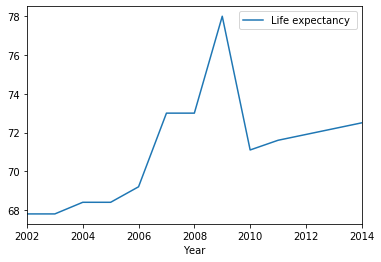

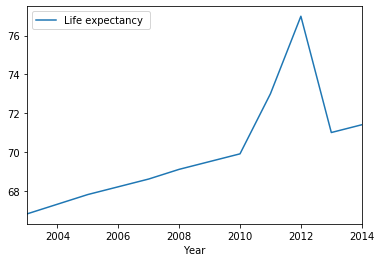

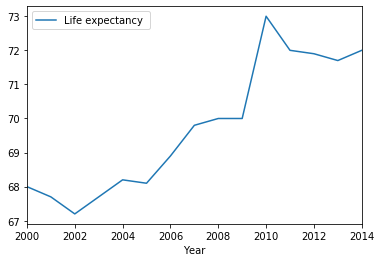

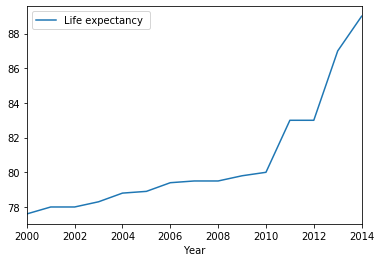

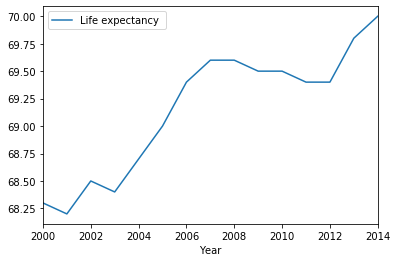

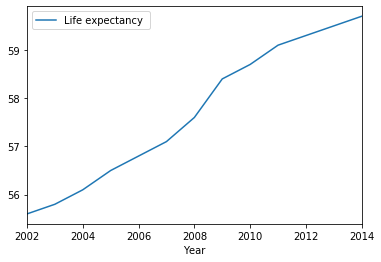

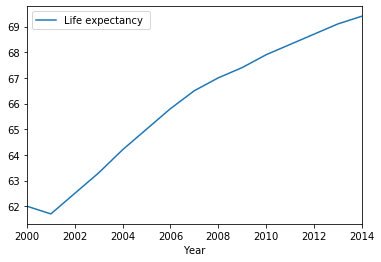

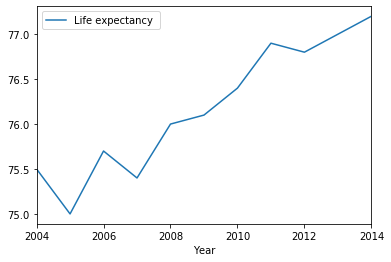

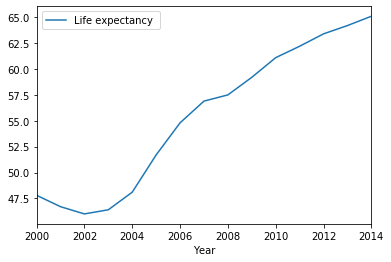

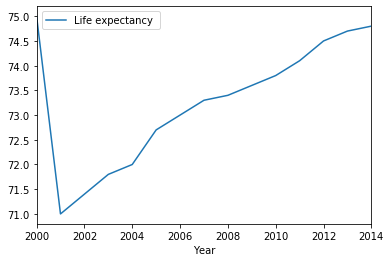

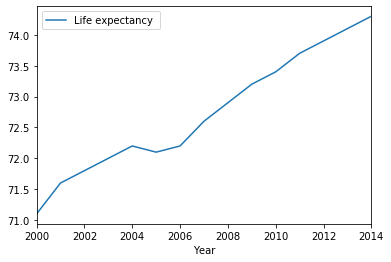

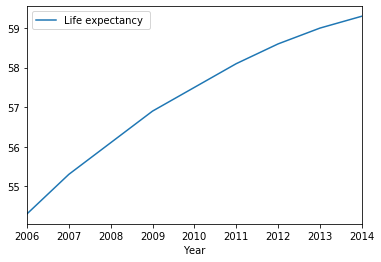

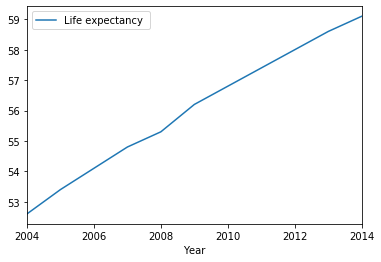

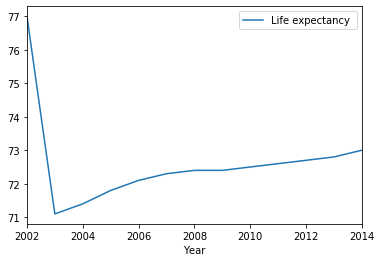

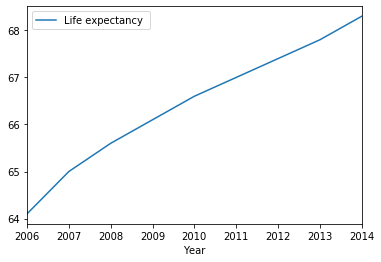

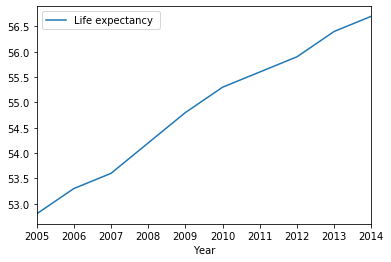

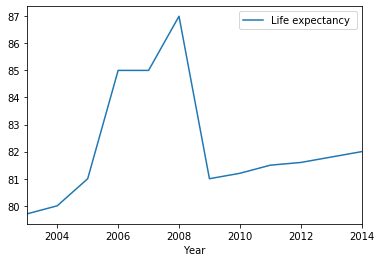

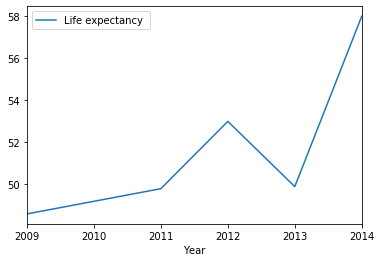

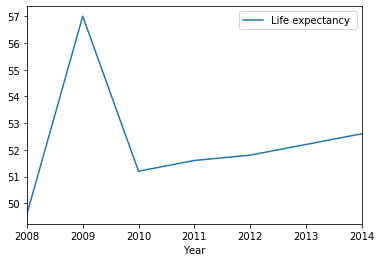

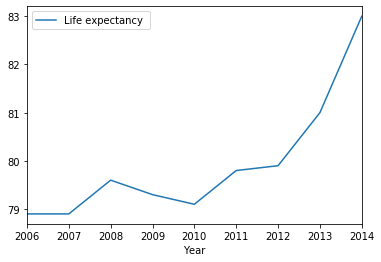

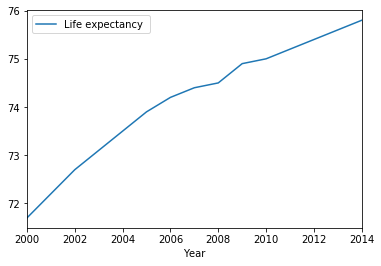

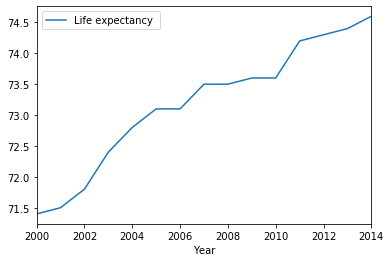

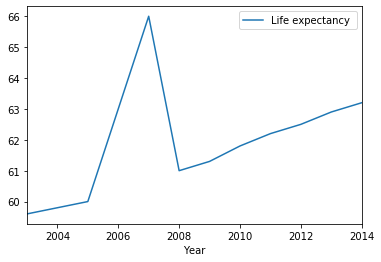

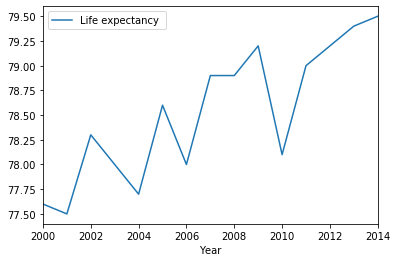

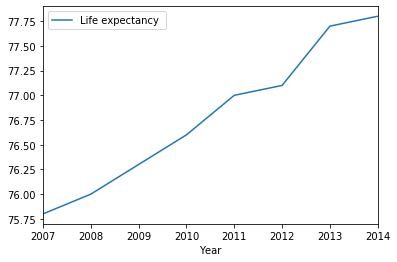

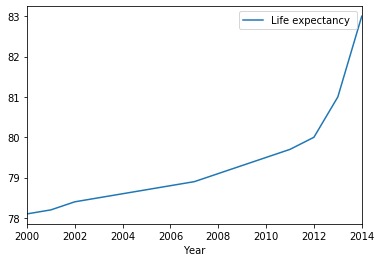

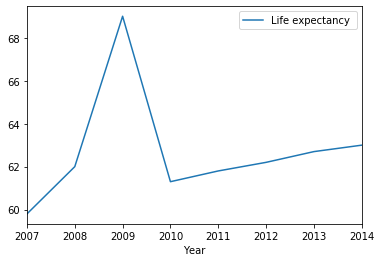

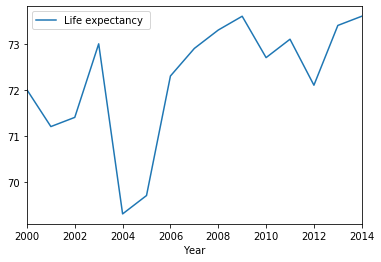

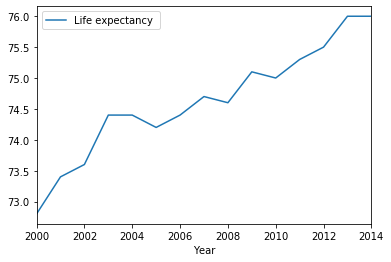

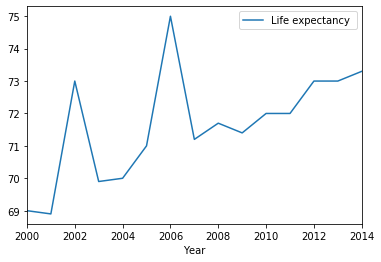

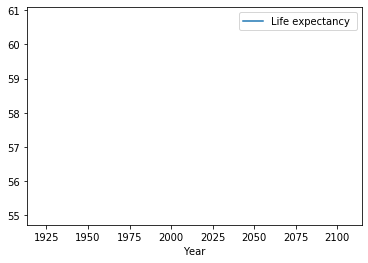

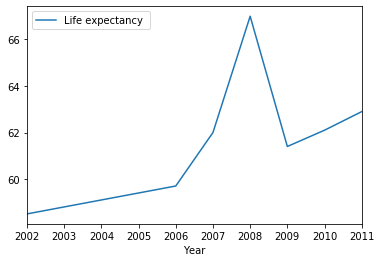

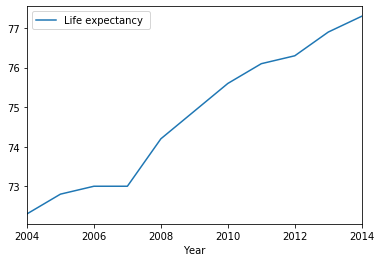

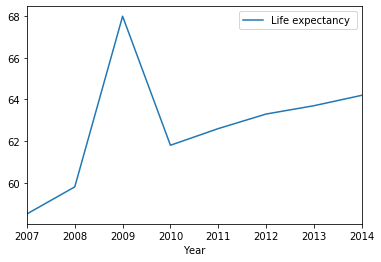

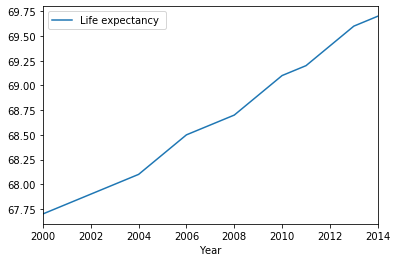

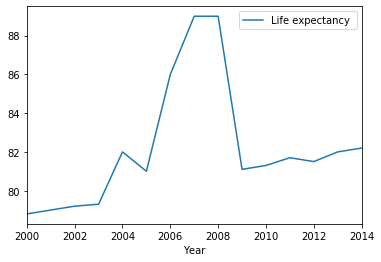

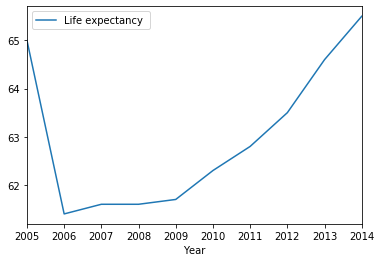

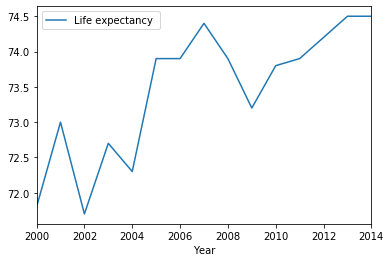

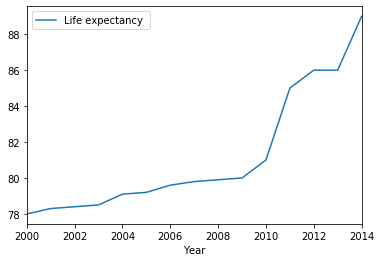

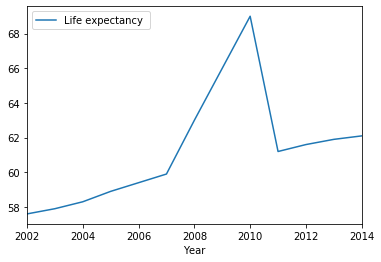

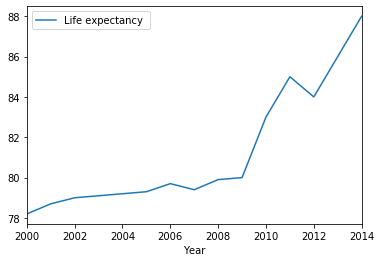

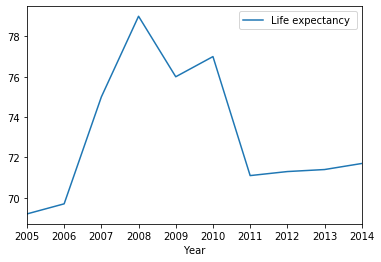

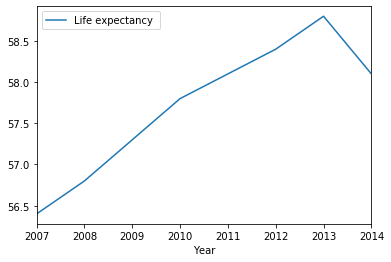

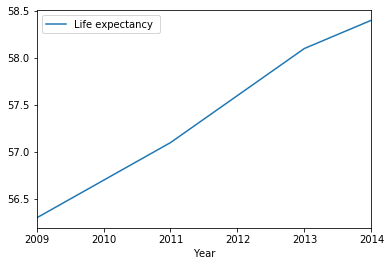

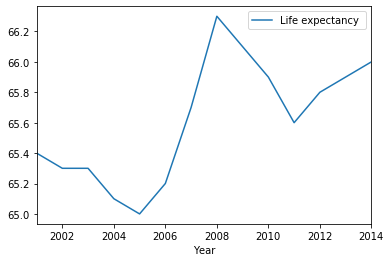

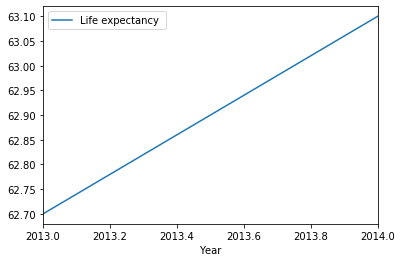

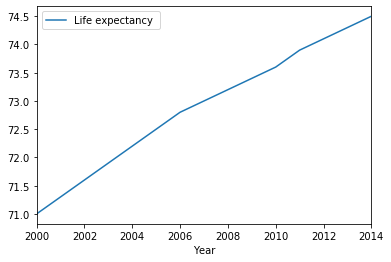

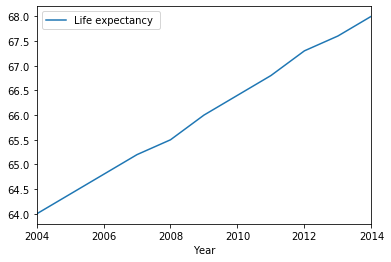

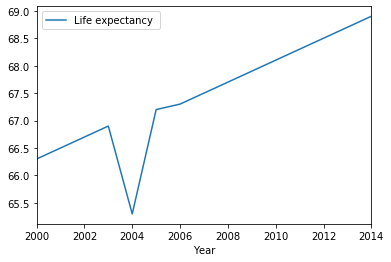

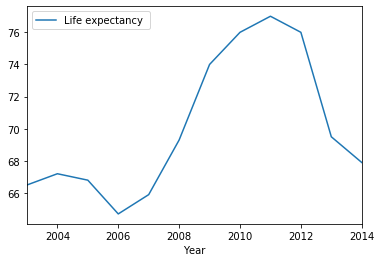

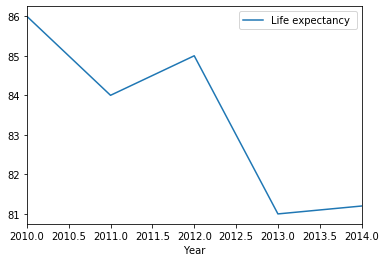

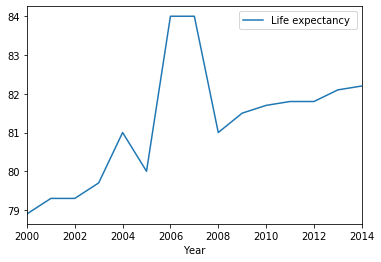

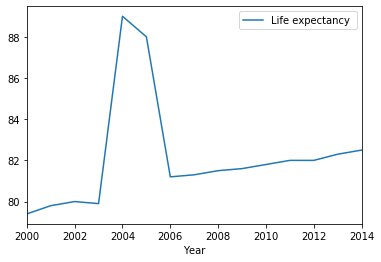

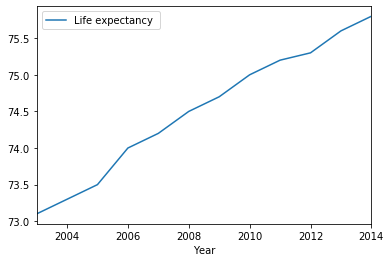

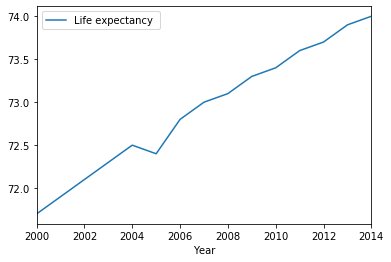

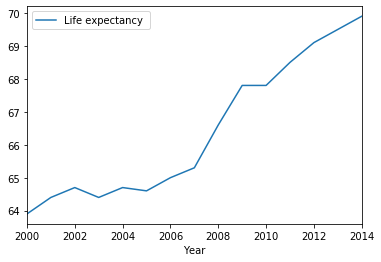

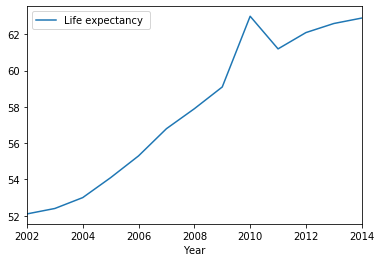

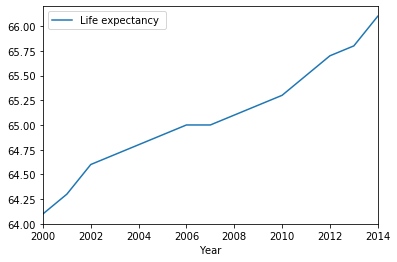

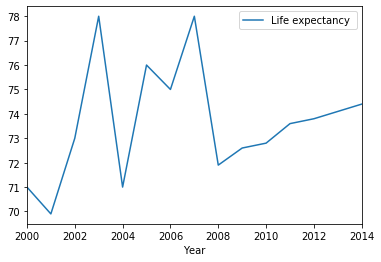

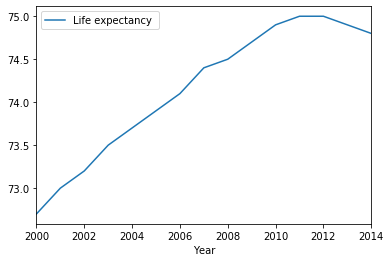

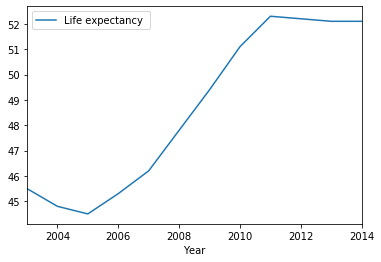

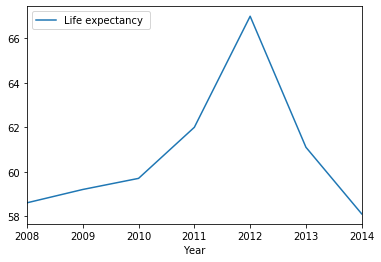

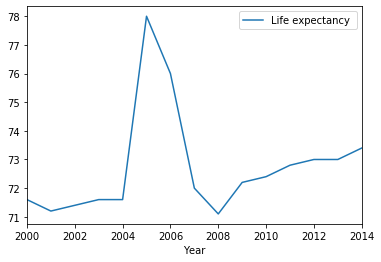

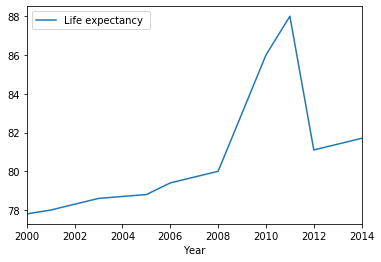

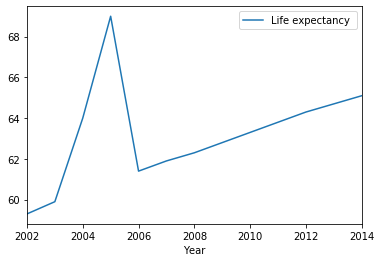

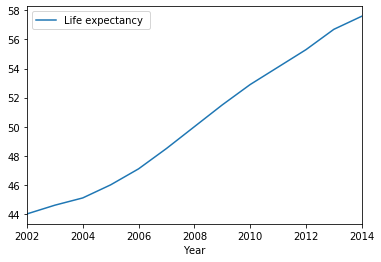

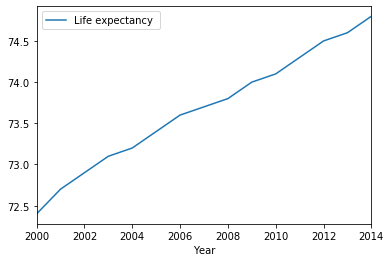

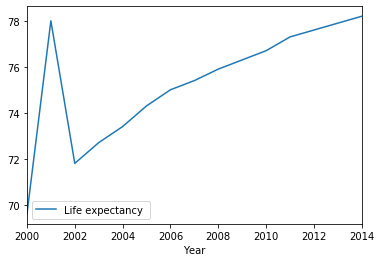

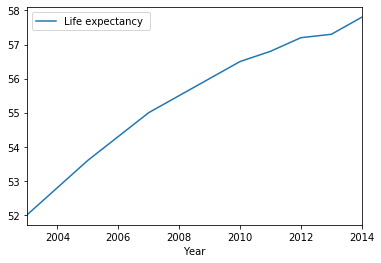

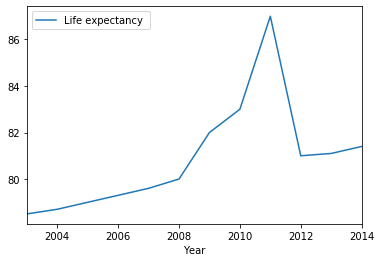

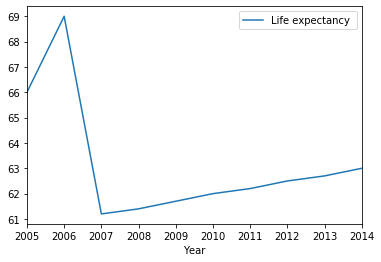

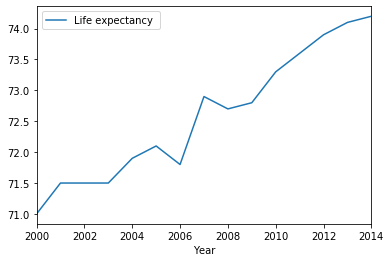

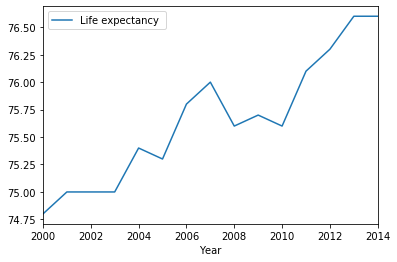

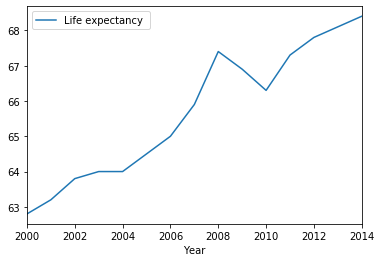

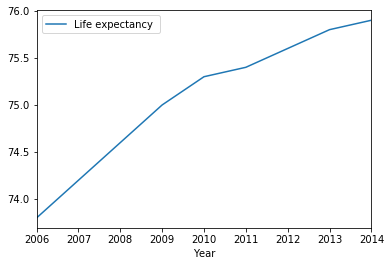

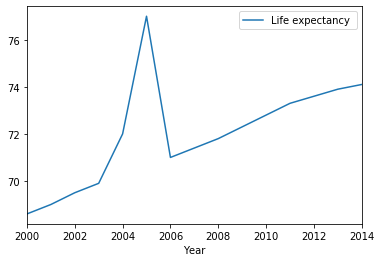

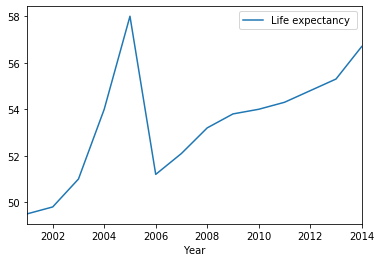

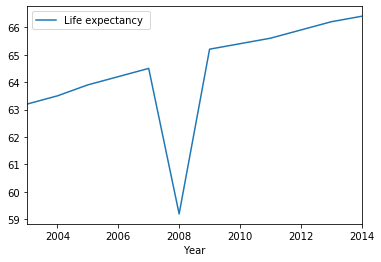

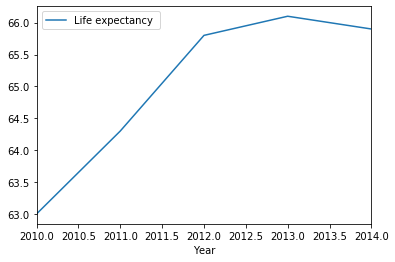

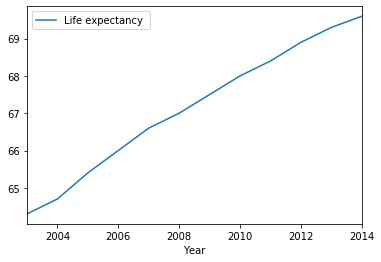

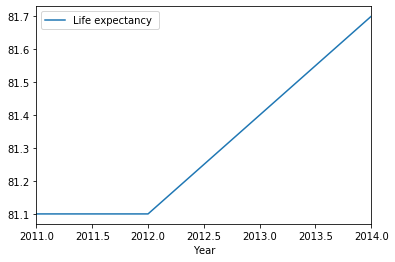

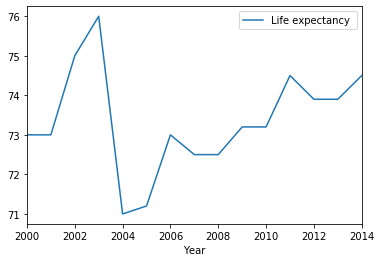

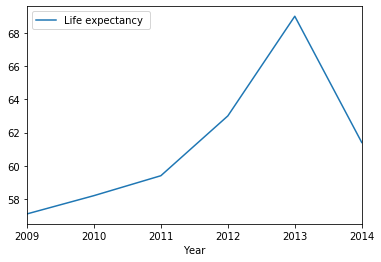

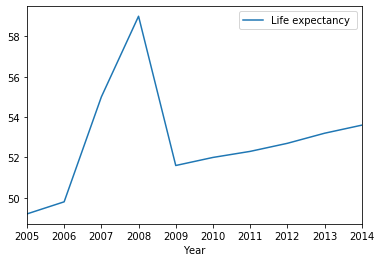

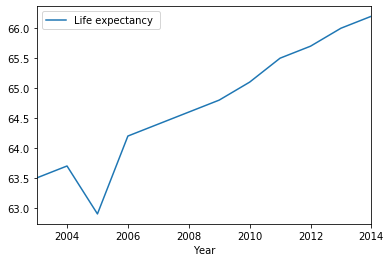

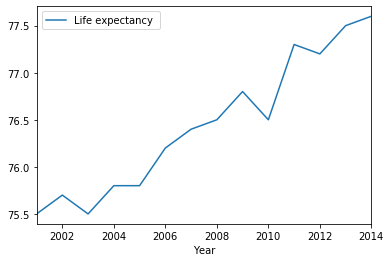

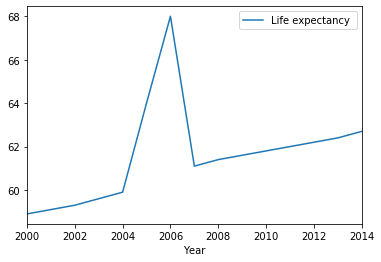

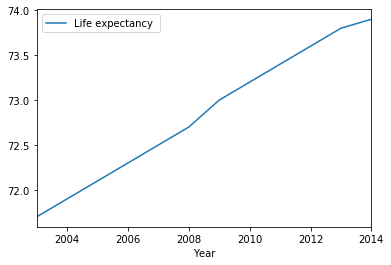

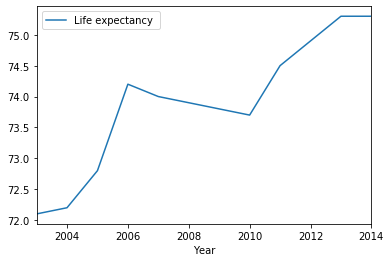

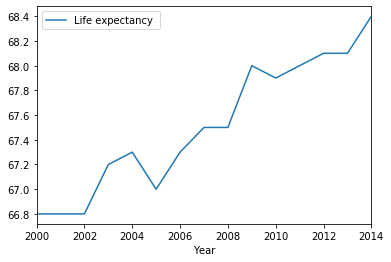

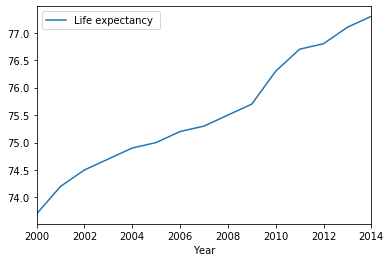

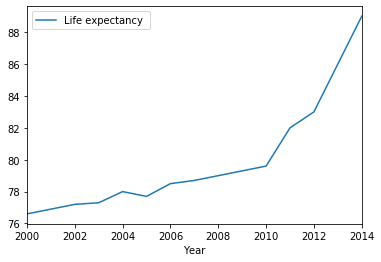

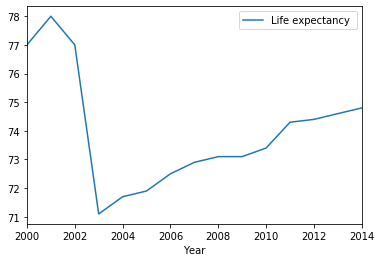

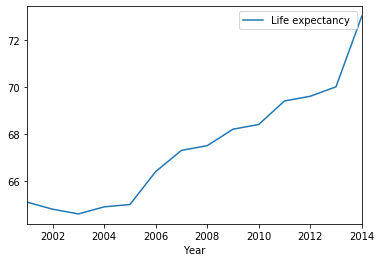

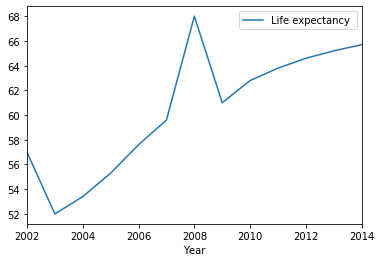

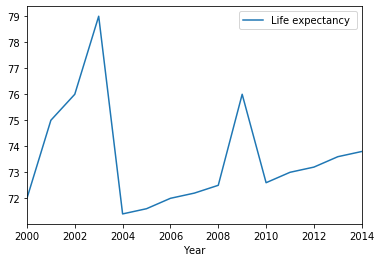

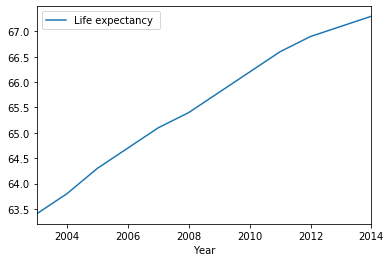

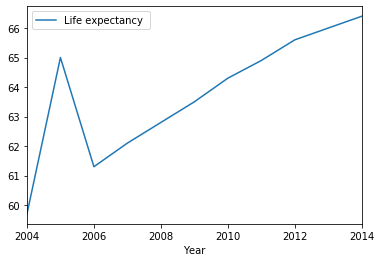

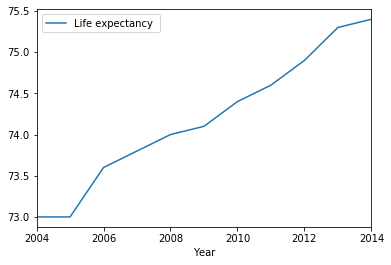

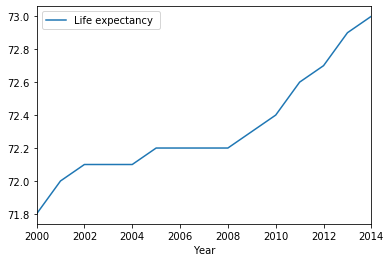

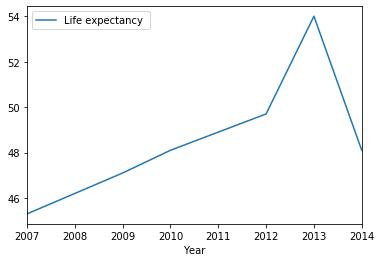

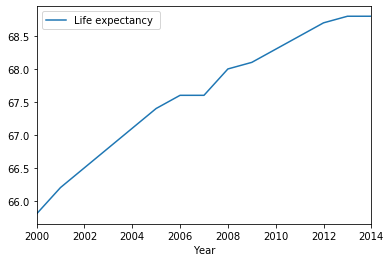

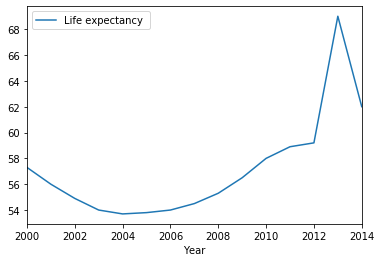

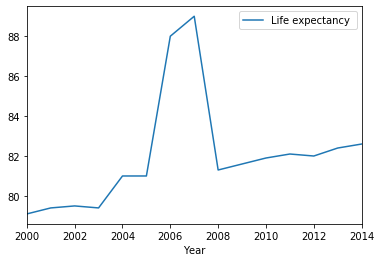

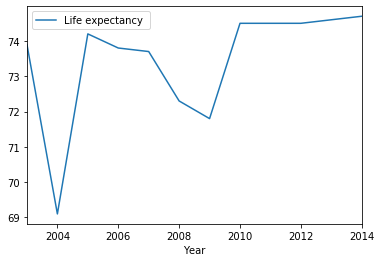

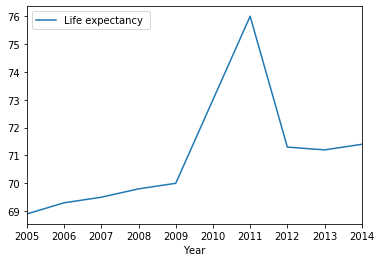

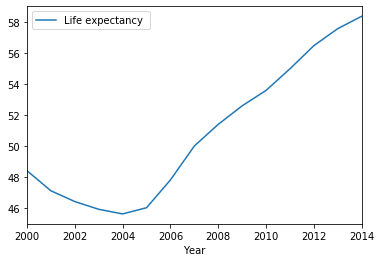

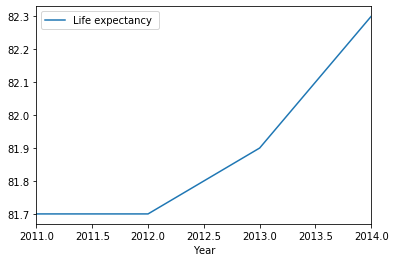

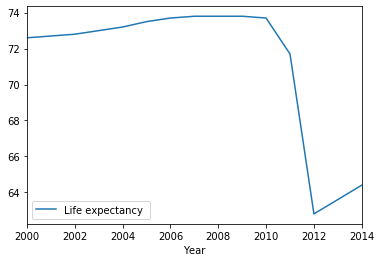

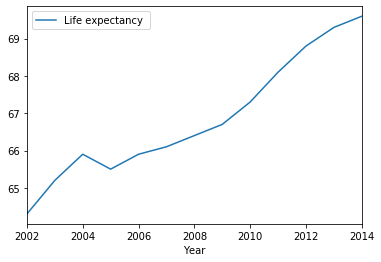

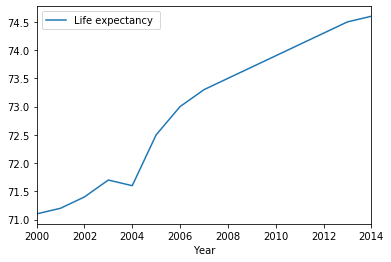

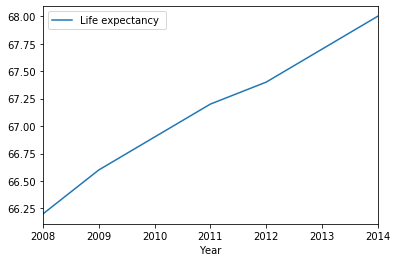

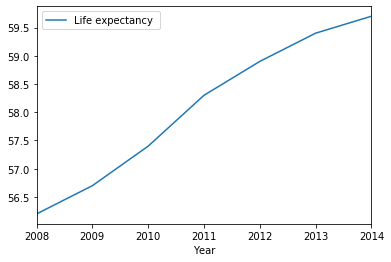

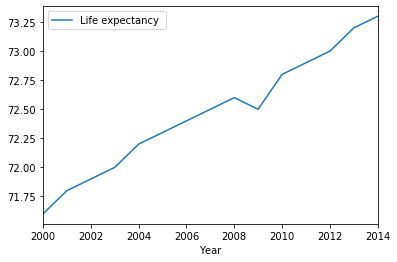

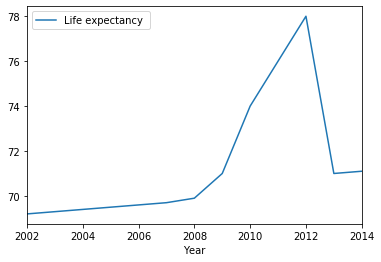

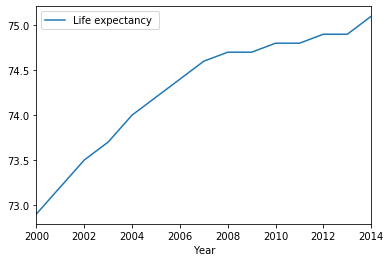

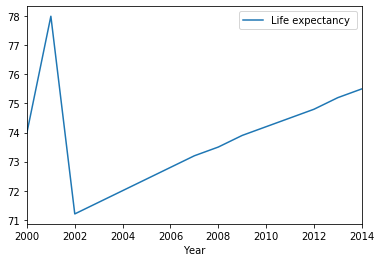

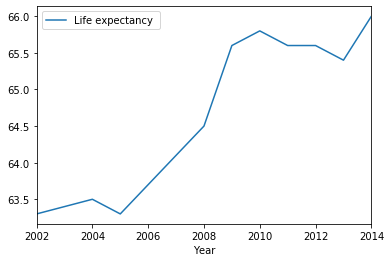

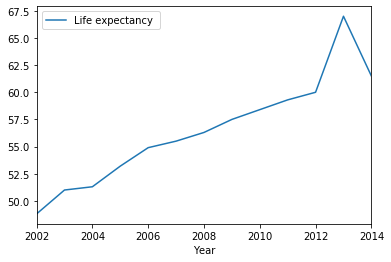

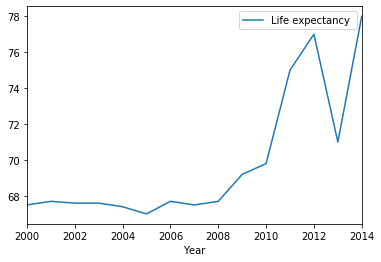

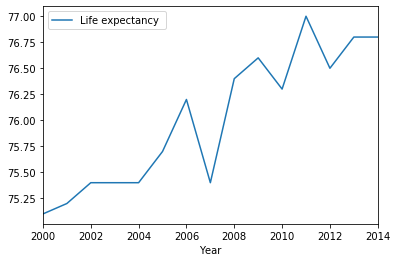

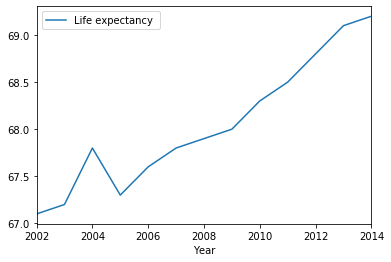

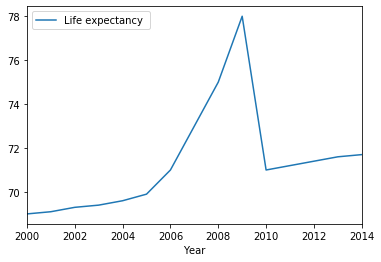

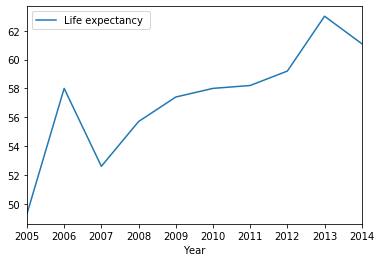

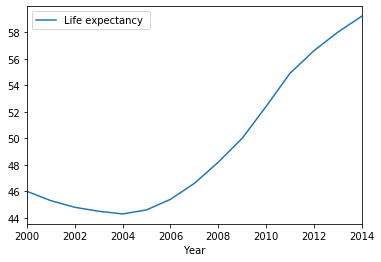

In [89]:
# fig,ax = plt.subplots(figsize=(20,6))
# ax.set_title('Variação do consumo de cerveja ao longo do ano',fontsize=20)
# ax.set_ylabel('Litros',fontsize=20)
# ax.set_xlabel('Dias',fontsize=20)
# ax = df['consumo'].plot(fontsize=14)
#mostrar as variações do consumo, como ele se comportou ao longo do tempo.
#queda de estruturas são dificeis de modelar
fig,ax = plt.subplots(figsize=(20,6))
df.groupby('Country').plot(x='Year', y='Life expectancy ')


## Correlação

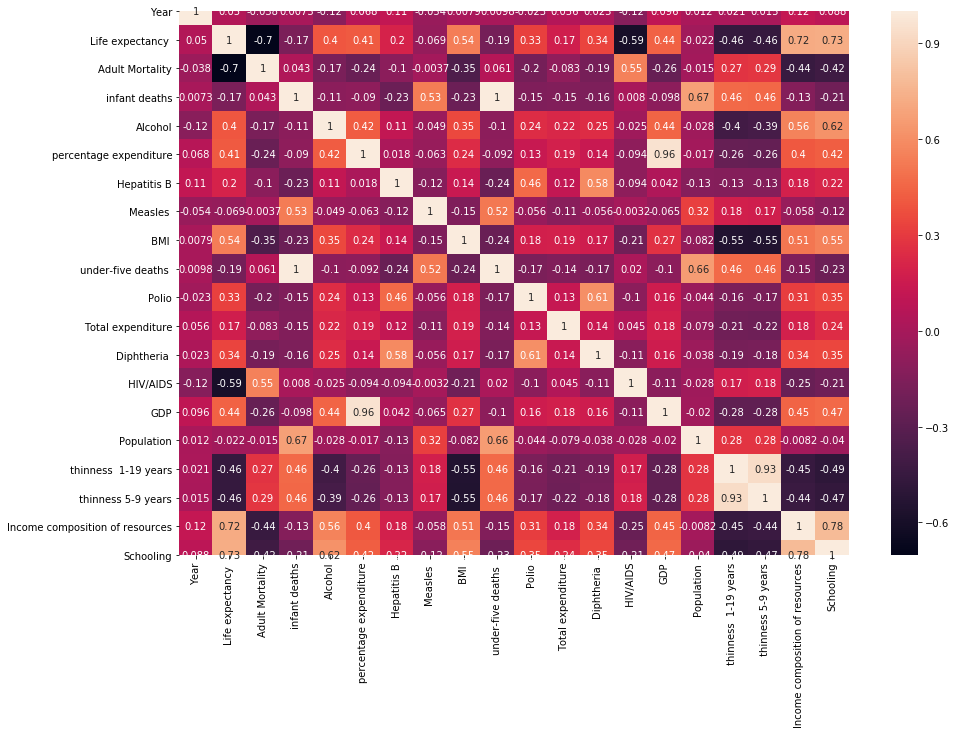

In [91]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

De acordo com a matriz de correlação, podemos utilizar como input do modelo as seguintes variáveis:
    * Schooling
    * Income composition of resources
    * Adult Mortality

In [137]:
df['Life expectancy ']

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 1657, dtype: float64

Text(0.5, 1.05, 'Disperção entre as variaveis')

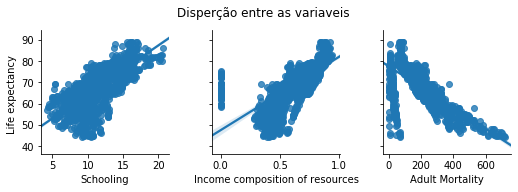

In [122]:
ax = sns.pairplot(df,y_vars='Life expectancy ',
                  x_vars=['Schooling','Income composition of resources','Adult Mortality'],
                  kind='reg')
ax.fig.suptitle('Disperção entre as variaveis',y=1.05)

## Modelo de Regressão linear

In [123]:
x = df[['Schooling','Income composition of resources','Adult Mortality']]
y = df['Life expectancy ']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2811)


In [125]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
modelo = LinearRegression()


In [129]:
modelo.fit(X_train, y_train)
print("R quadrado = {}".format(modelo.score(X_train,y_train).round(2)))


R quadrado = 0.74


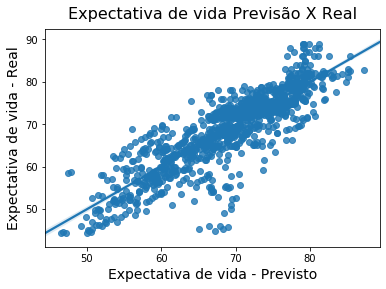

In [128]:
y_predict_train = modelo.predict(X_train)
ax = sns.regplot(x = y_predict_train,y=y_train)
ax.set_title('Expectativa de vida Previsão X Real', fontsize=16, y=1.02)
ax.set_xlabel("Expectativa de vida - Previsto", fontsize=14)
ax.set_ylabel("Expectativa de vida - Real", fontsize=14)
ax

In [130]:
lm = modelo.predict(X_test)
print("R quadrado de teste = {}".format(metrics.r2_score(y_test,lm).round(2)))


R quadrado de teste = 0.76


In [132]:
index = ['Intercept','Schooling','Income composition of resources','Adult Mortality']
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parametros'])


,Parametros
Intercept,52.747047
Schooling,1.156666
Income composition of resources,11.855207
Adult Mortality,-0.030094


In [108]:
EQM = metrics.mean_squared_error(y_test,lm).round(2)
EQM

17.48

In [136]:
import plotly.express as px
fig = px.scatter_3d(df, x='Schooling', y='Income composition of resources', z='Adult Mortality')

fig.update_layout(
    title="Visualização 3D da distribuição dos dados")
fig.show()
